In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [2]:
# Data Files
file_path = "group3_resources\SpotifyFeatures.csv"

#Load Data
orignal_df = pd.read_csv(file_path)
orignal_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
orignal_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
len(orignal_df)

232725

In [5]:
orignal_df['artist_name'].nunique()

14564

In [6]:
orignal_df['track_name'].nunique()

148615

In [7]:
orignal_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [8]:
orignal_df['genre'].nunique()

27

In [9]:
group_df = orignal_df.groupby(["genre",]).count()
group_df = group_df.sort_values(["track_name"], ascending=False)
group_df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Soundtrack,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646
Indie,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543
Jazz,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441
Pop,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386
Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
Children’s Music,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
Folk,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299
Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295


In [10]:
group_df['artist_name'].sum()

232725

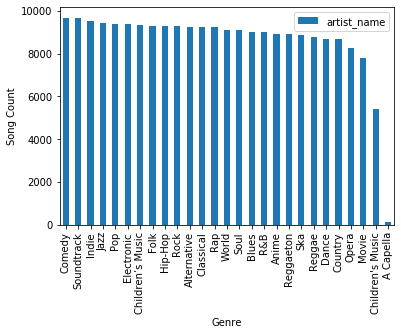

<Figure size 432x288 with 0 Axes>

In [11]:
drop_these = ['track_name', 'loudness','track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
genre_song_count = group_df.drop(columns = drop_these)
genre_song_chart = genre_song_count.plot(kind='bar')

genre_song_chart.set_xlabel('Genre')
genre_song_chart.set_ylabel("Song Count")

plt.show()
plt.tight_layout()

In [12]:
#Are there dupicates by artist, genre and track name
group_df = orignal_df.groupby(["artist_name", "genre", "track_name"]).count()
group_df = group_df.sort_values(["track_id"], ascending=False)
group_df

track_id  \
artist_name                       genre       track_name                                                     
!!!                               Alternative Even When The Water's Cold                                 1   
Orion Sun                         Alternative Antidote                                                   1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                               1   
                                              So In Love                                                 1   
                                  Rock        Enola Gay - Remastered                                     1   
...                                                                                                    ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...         1   
정진우                               R&B         I'll Find You (feat. June)                                 1   

                                                                                                  popularity  \
artist_name                       genre       track_name                                                       
!!!                               Alternative Even When The Water's Cold                                   1   
Orion Sun                         Alternative Antidote                                                     1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                 1   
                                              So In Love                                                   1   
                                  Rock        Enola Gay - Remastered                                       1   
...                                                                                                      ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...           1   
정진우                               R&B         I'll Find You (feat. June)                                   1   

                                                                                                  acousticness  \
artist_name                       genre       track_name                                                         
!!!                               Alternative Even When The Water's Cold                                     1   
Orion Sun                         Alternative Antidote                                                       1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                   1   
                                              So In Love                                                     1   
                                  Rock        Enola Gay - Remastered                                         1   
...                                                                                                        ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...             1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...             1   
                                              Verdi: Messa da Requiem:

In [13]:
#Before I get rid of duplicates, if a track has duplicated genres does that contribute to it's popularity?
group_df = orignal_df.groupby(["popularity", "artist_name", "track_name"]).count()
group_df2 = group_df.sort_values(["popularity", "genre"], ascending=False)
group_df2

genre  \
popularity artist_name   track_name                                        
100        Ariana Grande 7 rings                                       2   
99         Ariana Grande break up with your girlfriend, i'm bored      2   
           Post Malone   Wow.                                          2   
98         Daddy Yankee  Con Calma                                     3   
97         Halsey        Without Me                                    3   
...                                                                  ...   
0          graves        Exhale                                        1   
                         Glass Hearts (How Much You Mean)              1   
                         Intro                                         1   
           大原ゆい子         チャンス -Instrumental-                           1   
                         ラブビーム中 -Instrumental-                         1   

                                                                   track_id  \
popularity artist_name   track_name                                           
100        Ariana Grande 7 rings                                          2   
99         Ariana Grande break up with your girlfriend, i'm bored         2   
           Post Malone   Wow.                                             2   
98         Daddy Yankee  Con Calma                                        3   
97         Halsey        Without Me                                       3   
...                                                                     ...   
0          graves        Exhale                                           1   
                         Glass Hearts (How Much You Mean)                 1   
                         Intro                                            1   
           大原ゆい子         チャンス -Instrumental-                              1   
                         ラブビーム中 -Instrumental-                            1   

                                                                   acousticness  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-                                  1   
                         ラブビーム中 -Instrumental-                                1   

                                                                   danceability  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-             

In [14]:
group_df2.to_csv(r'group3_resources\carol_test.csv', index = True, header = True)

In [15]:
# Data Files
file_path = "group3_resources\carol_test.csv"

#Load Data
genre_counts_df = pd.read_csv(file_path)
genre_counts_df.head()

,popularity,artist_name,track_name,genre,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,100,Ariana Grande,7 rings,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,99,Ariana Grande,"break up with your girlfriend, i'm bored",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,99,Post Malone,Wow.,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,98,Daddy Yankee,Con Calma,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,97,Halsey,Without Me,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


The correlation between Number of Genre and popularity is 0.42


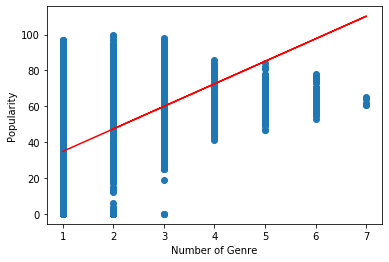

In [16]:
# I did scatter plot to help see if there's any correlation between the number 
#of genre's a song is in vs popularity. 
x=genre_counts_df['genre']
y=genre_counts_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=genre_counts_df['genre'], y=genre_counts_df['popularity'])
plt.plot(x,regress_values,"r-")
plt.show
plt.ylabel("Popularity")
plt.xlabel("Number of Genre");

correlation = st.pearsonr(x,y)
print(f"The correlation between Number of Genre and popularity is {round(correlation[0],2)}")

In [17]:
dfgroup = orignal_df.groupby(["popularity", "genre"]).count()
dfgroup


artist_name  track_name  track_id  acousticness  \
popularity genre                                                               
0          A Capella                  10          10        10            10   
           Alternative                 7           7         7             7   
           Anime                      36          36        36            36   
           Blues                      55          55        55            55   
           Children's Music         2966        2966      2966          2966   
...                                  ...         ...       ...           ...   
99         Dance                       1           1         1             1   
           Pop                         2           2         2             2   
           Rap                         1           1         1             1   
100        Dance                       1           1         1             1   
           Pop                         1           1         1             1   

                             danceability  duration_ms  energy  \
popularity genre                                                 
0          A Capella                   10           10      10   
           Alternative                  7            7       7   
           Anime                       36           36      36   
           Blues                       55           55      55   
           Children's Music          2966         2966    2966   
...                                   ...          ...     ...   
99         Dance                        1            1       1   
           Pop                          2            2       2   
           Rap                          1            1       1   
100        Dance                        1            1       1   
           Pop                          1            1       1   

                             instrumentalness   key  liveness  loudness  mode  \
popularity genre                                                                
0          A Capella                       10    10        10        10    10   
           Alternative                      7     7         7         7     7   
           Anime                           36    36        36        36    36   
           Blues                           55    55        55        55    55   
           Children's Music              2966  2966      2966      2966  2966   
...                                       ...   ...       ...       ...   ...   
99         Dance                            1     1         1         1     1   
           Pop                              2     2         2         2     2   
           Rap                              1     1         1         1     1   
100        Dance                            1     1         1         1     1   
           Pop                              1     1         1         1     1   

                             speechiness  tempo  time_signature  valence  
popularity genre                                                          
0          A Capella                  10     10              10       10  
           Alternative                 7      7               7        7  
           Anime                      36     36              36       36  
           Blues                      55     55              55       55  
           Children's Music         2966   2966            2966     2966  
...                                  ...    ...             ...      ...  
99         Dance                       1      1               1        1  
           Pop                         2      2               2        2  
           Rap                         1      1               1        1  
100        Dance                       1      1               1        1  
           Pop                         1      1               1        1  

[1832 rows x 16 columns]

In [18]:
dfgroup.to_csv(r'group3_resources\carol_test2.csv', index = True, header = True)

In [19]:
orignal_df.corr()
#missing popularity
#groupby genre and then run coorolations

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [20]:
df2 = orignal_df.loc[orignal_df["genre"] == "Folk"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.029047,0.046409,-0.005297,0.056787,-0.058579,-0.055488,0.046695,-0.014179,-0.009207,0.032965
acousticness,-0.029047,1.000000,-0.090287,-0.083569,-0.750295,0.070784,-0.105789,-0.599980,-0.035936,-0.094543,-0.327986
danceability,0.046409,-0.090287,1.000000,-0.140158,0.126751,-0.109342,-0.068600,0.076820,0.073094,-0.126074,0.449352
duration_ms,-0.005297,-0.083569,-0.140158,1.000000,0.039352,0.142308,0.042635,0.012005,-0.076287,0.001643,-0.182831
energy,0.056787,-0.750295,0.126751,0.039352,1.000000,-0.012968,0.164365,0.777821,0.140805,0.138113,0.469361
instrumentalness,-0.058579,0.070784,-0.109342,0.142308,-0.012968,1.000000,-0.024854,-0.149020,-0.039163,-0.008417,-0.129070
liveness,-0.055488,-0.105789,-0.068600,0.042635,0.164365,-0.024854,1.000000,0.093186,0.106492,0.012668,0.096078
loudness,0.046695,-0.599980,0.076820,0.012005,0.777821,-0.149020,0.093186,1.000000,0.044304,0.085489,0.252764
speechiness,-0.014179,-0.035936,0.073094,-0.076287,0.140805,-0.039163,0.106492,0.044304,1.000000,0.080121,0.103379
tempo,-0.009207,-0.094543,-0.126074,0.001643,0.138113,-0.008417,0.012668,0.085489,0.080121,1.000000,0.099475


In [21]:
df2 = orignal_df.loc[orignal_df["genre"] == "Hip-Hop"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.013038,0.091620,0.012769,-0.032563,-0.041420,-0.063401,0.086961,-0.083544,0.014690,0.029351
acousticness,0.013038,1.000000,-0.150690,0.030898,-0.220059,-0.000943,-0.028460,-0.206787,0.086735,-0.082001,0.048059
danceability,0.091620,-0.150690,1.000000,-0.149038,-0.155492,-0.035162,-0.183248,0.007581,-0.078414,-0.022568,0.166175
duration_ms,0.012769,0.030898,-0.149038,1.000000,0.088546,-0.041367,0.048203,0.030833,0.012863,-0.085640,0.015654
energy,-0.032563,-0.220059,-0.155492,0.088546,1.000000,-0.055281,0.188547,0.664657,-0.010065,0.009531,0.320501
instrumentalness,-0.041420,-0.000943,-0.035162,-0.041367,-0.055281,1.000000,-0.027548,-0.096950,-0.107249,0.004782,-0.018577
liveness,-0.063401,-0.028460,-0.183248,0.048203,0.188547,-0.027548,1.000000,0.070997,0.120308,-0.028035,0.055793
loudness,0.086961,-0.206787,0.007581,0.030833,0.664657,-0.096950,0.070997,1.000000,-0.122692,0.033580,0.161229
speechiness,-0.083544,0.086735,-0.078414,0.012863,-0.010065,-0.107249,0.120308,-0.122692,1.000000,0.052519,0.075404
tempo,0.014690,-0.082001,-0.022568,-0.085640,0.009531,0.004782,-0.028035,0.033580,0.052519,1.000000,-0.040909


In [22]:
df2 = orignal_df.loc[orignal_df["genre"] == "Indie"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.057699,0.097425,-0.024698,-0.072737,-0.076112,-0.039362,-0.005017,0.035509,-0.053499,-0.011516
acousticness,0.057699,1.000000,-0.089351,0.003190,-0.743078,0.070694,-0.128993,-0.636469,-0.068997,-0.109804,-0.330084
danceability,0.097425,-0.089351,1.000000,-0.183588,0.035073,-0.107738,-0.049117,0.076875,0.160331,-0.195339,0.352827
duration_ms,-0.024698,0.003190,-0.183588,1.000000,-0.020505,0.113142,-0.039619,-0.052522,-0.121596,0.013629,-0.188787
energy,-0.072737,-0.743078,0.035073,-0.020505,1.000000,-0.016405,0.172293,0.787669,0.100783,0.159314,0.448819
instrumentalness,-0.076112,0.070694,-0.107738,0.113142,-0.016405,1.000000,0.003558,-0.187697,-0.115110,0.026040,-0.070814
liveness,-0.039362,-0.128993,-0.049117,-0.039619,0.172293,0.003558,1.000000,0.122853,0.063653,0.019982,0.089638
loudness,-0.005017,-0.636469,0.076875,-0.052522,0.787669,-0.187697,0.122853,1.000000,0.068463,0.098546,0.343651
speechiness,0.035509,-0.068997,0.160331,-0.121596,0.100783,-0.115110,0.063653,0.068463,1.000000,0.021187,0.081203
tempo,-0.053499,-0.109804,-0.195339,0.013629,0.159314,0.026040,0.019982,0.098546,0.021187,1.000000,0.052361


In [23]:
df2 = orignal_df.loc[orignal_df["genre"] == "Soul"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.013006,0.060536,-0.026750,0.012687,-0.000945,-0.068243,0.050903,-0.006146,-0.018404,-0.026078
acousticness,-0.013006,1.000000,-0.273394,-0.064129,-0.581787,0.084404,-0.020506,-0.472262,-0.062045,-0.060333,-0.155013
danceability,0.060536,-0.273394,1.000000,-0.062683,0.173208,-0.022551,-0.105877,0.144156,0.098096,-0.108985,0.353819
duration_ms,-0.026750,-0.064129,-0.062683,1.000000,-0.002783,0.099467,0.024499,-0.092158,-0.077650,-0.025047,-0.053501
energy,0.012687,-0.581787,0.173208,-0.002783,1.000000,-0.046331,0.106849,0.707874,0.096211,0.084012,0.372645
instrumentalness,-0.000945,0.084404,-0.022551,0.099467,-0.046331,1.000000,-0.034591,-0.201673,-0.087605,-0.001694,-0.132342
liveness,-0.068243,-0.020506,-0.105877,0.024499,0.106849,-0.034591,1.000000,0.036769,0.059386,0.002333,0.056494
loudness,0.050903,-0.472262,0.144156,-0.092158,0.707874,-0.201673,0.036769,1.000000,0.054917,0.068170,0.151772
speechiness,-0.006146,-0.062045,0.098096,-0.077650,0.096211,-0.087605,0.059386,0.054917,1.000000,0.057650,0.059547
tempo,-0.018404,-0.060333,-0.108985,-0.025047,0.084012,-0.001694,0.002333,0.068170,0.057650,1.000000,0.027628


In [33]:
# Data Files
file_path1 = "group3_resources/1950.csv"
file_path2 = "group3_resources/1960.csv"
file_path3 = "group3_resources/1970.csv"
file_path4 = "group3_resources/1980.csv"
file_path5 = "group3_resources/1990.csv"
file_path6 = "group3_resources/2000.csv"
file_path7 = "group3_resources/2010.csv"

#Load Data
fifty_df = pd.read_csv(file_path1)
sixty_df = pd.read_csv(file_path2)
seventy_df = pd.read_csv(file_path3)
eighty_df = pd.read_csv(file_path4)
ninty_df = pd.read_csv(file_path5)
two_thousand_df = pd.read_csv(file_path6)
tens_df = pd.read_csv(file_path7)


In [35]:
tens_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,-0.419685,-0.108064,0.423453,-0.069998,0.356519,0.104397,0.165425,0.067154,-0.246155,-0.185075,-0.874115
year,-0.419685,1.000000,0.026997,-0.404827,0.266851,-0.216683,-0.072513,-0.202528,-0.205454,0.240611,0.123326,0.352484
bpm,-0.108064,0.026997,1.000000,0.026813,-0.076467,-0.043644,-0.014262,-0.076299,-0.027527,-0.057103,0.079919,0.117333
nrgy,0.423453,-0.404827,0.026813,1.000000,0.061161,0.794119,0.174272,0.424567,-0.174527,-0.510088,-0.083491,-0.388912
dnce,-0.069998,0.266851,-0.076467,0.061161,1.000000,0.132524,0.045431,0.387219,-0.274811,-0.103396,0.002579,-0.008668
dB,0.356519,-0.216683,-0.043644,0.794119,0.132524,1.000000,0.069180,0.375732,-0.213595,-0.355173,-0.280863,-0.356269
live,0.104397,-0.072513,-0.014262,0.174272,0.045431,0.069180,1.000000,0.005110,0.137844,-0.183309,0.005708,-0.030804
val,0.165425,-0.202528,-0.076299,0.424567,0.387219,0.375732,0.005110,1.000000,-0.174337,-0.061060,-0.039430,-0.194638
dur,0.067154,-0.205454,-0.027527,-0.174527,-0.274811,-0.213595,0.137844,-0.174337,1.000000,0.052761,-0.050768,0.009269
acous,-0.246155,0.240611,-0.057103,-0.510088,-0.103396,-0.355173,-0.183309,-0.061060,0.052761,1.000000,0.115504,0.230120


In [36]:
two_thousand_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.097394,0.021156,0.164576,0.093872,0.005874,0.059948,0.144494,-0.043350,-0.108533,-0.101067,-0.902361
year,0.097394,1.000000,0.050055,-0.041248,-0.147939,-0.031290,-0.012439,-0.090561,-0.234256,-0.092137,-0.176929,-0.174726
bpm,0.021156,0.050055,1.000000,0.203488,-0.143560,0.026788,0.072081,-0.149536,0.234765,-0.152661,0.069288,0.001875
nrgy,0.164576,-0.041248,0.203488,1.000000,-0.149707,0.566809,0.268668,0.179759,-0.188692,-0.398900,0.043489,-0.144934
dnce,0.093872,-0.147939,-0.143560,-0.149707,1.000000,-0.037605,-0.174563,0.452337,0.035989,-0.090424,0.092334,-0.043773
dB,0.005874,-0.031290,0.026788,0.566809,-0.037605,1.000000,0.098773,0.197403,-0.001986,-0.076644,0.024386,0.012183
live,0.059948,-0.012439,0.072081,0.268668,-0.174563,0.098773,1.000000,-0.026856,-0.074728,-0.210085,0.242264,-0.015658
val,0.144494,-0.090561,-0.149536,0.179759,0.452337,0.197403,-0.026856,1.000000,-0.049414,-0.139605,0.162655,-0.120918
dur,-0.043350,-0.234256,0.234765,-0.188692,0.035989,-0.001986,-0.074728,-0.049414,1.000000,0.067860,0.187321,0.044171
acous,-0.108533,-0.092137,-0.152661,-0.398900,-0.090424,-0.076644,-0.210085,-0.139605,0.067860,1.000000,-0.118175,0.033247


In [37]:
ninty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.245419,0.062964,0.031584,-0.047788,-0.275793,0.006702,-0.077297,0.041938,0.072364,-0.095171,-0.975848
year,0.245419,1.000000,0.001233,-0.002789,0.208521,0.182715,0.005262,0.063102,-0.039441,0.006388,0.149623,-0.286065
bpm,0.062964,0.001233,1.000000,0.177109,-0.243259,-0.117594,-0.182570,0.048503,-0.048905,-0.110845,-0.002242,-0.036132
nrgy,0.031584,-0.002789,0.177109,1.000000,0.308620,0.364605,0.010220,0.596832,-0.377217,-0.522461,0.044112,-0.012627
dnce,-0.047788,0.208521,-0.243259,0.308620,1.000000,0.171825,-0.000482,0.626658,-0.314489,-0.337541,0.352407,0.035148
dB,-0.275793,0.182715,-0.117594,0.364605,0.171825,1.000000,0.085531,0.168773,-0.200277,-0.203874,0.198004,0.273436
live,0.006702,0.005262,-0.182570,0.010220,-0.000482,0.085531,1.000000,0.057239,-0.027955,0.103908,-0.027372,-0.013417
val,-0.077297,0.063102,0.048503,0.596832,0.626658,0.168773,0.057239,1.000000,-0.404096,-0.463075,0.286931,0.094985
dur,0.041938,-0.039441,-0.048905,-0.377217,-0.314489,-0.200277,-0.027955,-0.404096,1.000000,0.258443,-0.067329,-0.101626
acous,0.072364,0.006388,-0.110845,-0.522461,-0.337541,-0.203874,0.103908,-0.463075,0.258443,1.000000,-0.021820,-0.081579


In [38]:
eighty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.226124,0.043469,0.058997,0.092347,-0.042272,-0.061558,0.088182,0.123725,0.146831,-0.092898,-0.948114
year,0.226124,1.000000,-0.014007,0.226273,0.143985,0.296413,-0.094952,0.141635,0.049201,-0.048284,0.013536,-0.244068
bpm,0.043469,-0.014007,1.000000,0.093372,-0.175019,0.027610,-0.036683,0.079423,-0.229556,-0.074015,0.097939,-0.024553
nrgy,0.058997,0.226273,0.093372,1.000000,0.107011,0.771913,0.235062,0.572673,-0.012705,-0.447982,0.335543,-0.093747
dnce,0.092347,0.143985,-0.175019,0.107011,1.000000,0.023546,-0.076616,0.515079,-0.023165,-0.097598,0.068680,-0.119337
dB,-0.042272,0.296413,0.027610,0.771913,0.023546,1.000000,0.234426,0.292908,-0.030365,-0.353352,0.241769,-0.011265
live,-0.061558,-0.094952,-0.036683,0.235062,-0.076616,0.234426,1.000000,0.145817,-0.181547,-0.100180,0.101480,0.067427
val,0.088182,0.141635,0.079423,0.572673,0.515079,0.292908,0.145817,1.000000,-0.073533,-0.275140,0.186896,-0.096625
dur,0.123725,0.049201,-0.229556,-0.012705,-0.023165,-0.030365,-0.181547,-0.073533,1.000000,0.088922,-0.032994,-0.168743
acous,0.146831,-0.048284,-0.074015,-0.447982,-0.097598,-0.353352,-0.100180,-0.275140,0.088922,1.000000,0.039785,-0.129630


In [40]:
seventy_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.292276,0.074912,0.128141,0.007502,0.074633,0.004476,0.176643,-0.203715,0.023741,-0.102073,-0.988264
year,0.292276,1.000000,-0.041558,0.232814,0.172110,0.200561,0.039492,0.186671,-0.160471,-0.148508,-0.017678,-0.276680
bpm,0.074912,-0.041558,1.000000,0.038774,-0.095560,-0.044142,-0.018616,0.044797,0.052125,-0.127571,0.129123,-0.072117
nrgy,0.128141,0.232814,0.038774,1.000000,0.366248,0.689531,0.121791,0.508909,0.030407,-0.624053,0.436489,-0.115439
dnce,0.007502,0.172110,-0.095560,0.366248,1.000000,0.117634,-0.038819,0.680564,0.017006,-0.350125,0.087649,0.007383
dB,0.074633,0.200561,-0.044142,0.689531,0.117634,1.000000,0.129274,0.136555,0.034079,-0.290991,0.335187,-0.069525
live,0.004476,0.039492,-0.018616,0.121791,-0.038819,0.129274,1.000000,0.027975,-0.041507,-0.120916,0.143605,0.026471
val,0.176643,0.186671,0.044797,0.508909,0.680564,0.136555,0.027975,1.000000,-0.157382,-0.458129,0.016982,-0.156941
dur,-0.203715,-0.160471,0.052125,0.030407,0.017006,0.034079,-0.041507,-0.157382,1.000000,-0.138132,-0.124008,0.224916
acous,0.023741,-0.148508,-0.127571,-0.624053,-0.350125,-0.290991,-0.120916,-0.458129,-0.138132,1.000000,-0.329176,-0.035391


In [41]:
sixty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.179555,0.007915,0.075578,-0.071182,-0.120252,0.167133,0.024540,0.072829,0.029705,0.224487,-0.977873
year,0.179555,1.000000,-0.083877,0.055452,0.032583,0.207376,0.106616,0.102498,-0.280886,0.007946,-0.052579,-0.221209
bpm,0.007915,-0.083877,1.000000,0.276458,-0.014110,0.096254,0.059021,0.202070,-0.064021,-0.415615,0.085678,-0.026305
nrgy,0.075578,0.055452,0.276458,1.000000,0.187168,0.633645,0.113538,0.508773,-0.234599,-0.504760,0.159495,-0.103515
dnce,-0.071182,0.032583,-0.014110,0.187168,1.000000,0.059537,-0.087077,0.535122,-0.261657,-0.109310,0.030975,0.072653
dB,-0.120252,0.207376,0.096254,0.633645,0.059537,1.000000,0.027818,0.254776,-0.370039,-0.284752,-0.076873,0.100953
live,0.167133,0.106616,0.059021,0.113538,-0.087077,0.027818,1.000000,0.066934,-0.084071,-0.044529,0.067247,-0.180914
val,0.024540,0.102498,0.202070,0.508773,0.535122,0.254776,0.066934,1.000000,-0.277485,-0.296621,0.048488,-0.065692
dur,0.072829,-0.280886,-0.064021,-0.234599,-0.261657,-0.370039,-0.084071,-0.277485,1.000000,0.154208,0.018036,-0.052333
acous,0.029705,0.007946,-0.415615,-0.504760,-0.109310,-0.284752,-0.044529,-0.296621,0.154208,1.000000,0.076925,-0.019889


In [43]:
fifty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.422396,-0.015941,0.097601,0.166147,0.115778,0.046511,0.011716,-0.238669,-0.006699,-0.094507,-0.970352
year,0.422396,1.000000,0.038218,0.026132,0.066132,0.106972,0.042248,-0.091981,-0.070141,0.080212,-0.074749,-0.396881
bpm,-0.015941,0.038218,1.000000,0.210874,0.081940,0.107066,0.239918,0.389949,-0.199243,0.051533,0.132824,0.017958
nrgy,0.097601,0.026132,0.210874,1.000000,0.338332,0.680760,0.298083,0.676760,-0.308150,-0.576952,0.283072,-0.087979
dnce,0.166147,0.066132,0.081940,0.338332,1.000000,0.253853,-0.037197,0.620509,-0.379617,-0.209560,0.428879,-0.134258
dB,0.115778,0.106972,0.107066,0.680760,0.253853,1.000000,0.165035,0.445237,-0.356963,-0.275344,-0.005314,-0.092056
live,0.046511,0.042248,0.239918,0.298083,-0.037197,0.165035,1.000000,0.207219,-0.095862,-0.131614,0.156713,-0.002513
val,0.011716,-0.091981,0.389949,0.676760,0.620509,0.445237,0.207219,1.000000,-0.446385,-0.369314,0.319332,0.000261
dur,-0.238669,-0.070141,-0.199243,-0.308150,-0.379617,-0.356963,-0.095862,-0.446385,1.000000,0.087276,-0.045881,0.207420
acous,-0.006699,0.080212,0.051533,-0.576952,-0.209560,-0.275344,-0.131614,-0.369314,0.087276,1.000000,-0.104261,0.022396


In [51]:
fifty_df.count()

Number       73
title        73
artist       73
top genre    61
year         73
bpm          73
nrgy         73
dnce         73
dB           73
live         73
val          73
dur          73
acous        73
spch         73
pop          73
dtype: int64

In [52]:
sixty_df.count()

Number       97
title        97
artist       97
top genre    97
year         97
bpm          97
nrgy         97
dnce         97
dB           97
live         97
val          97
dur          97
acous        97
spch         97
pop          97
dtype: int64

In [53]:
seventy_df.count()

Number       104
title        104
artist       104
top genre    104
year         104
bpm          104
nrgy         104
dnce         104
dB           104
live         104
val          104
dur          104
acous        104
spch         104
pop          104
dtype: int64

In [54]:
eighty_df.count()


Number       105
title        105
artist       105
top genre    104
year         105
bpm          105
nrgy         105
dnce         105
dB           105
live         105
val          105
dur          105
acous        105
spch         105
pop          105
dtype: int64

In [55]:
ninty_df.count()

Number       88
title        88
artist       88
top genre    85
year         88
bpm          88
nrgy         88
dnce         88
dB           88
live         88
val          88
dur          88
acous        88
spch         88
pop          88
dtype: int64

In [56]:
two_thousand_df.count()

Number       100
title        100
artist       100
top genre    100
year         100
bpm          100
nrgy         100
dnce         100
dB           100
live         100
val          100
dur          100
acous        100
spch         100
pop          100
dtype: int64

In [57]:
tens_df.count()

Number       100
title        100
artist       100
top genre    100
year         100
bpm          100
nrgy         100
dnce         100
dB           100
live         100
val          100
dur          100
acous        100
spch         100
pop          100
dtype: int64

In [107]:
tens_df.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2015.910000,118.720000,67.980000,65.370000,-5.490000,17.930000,46.350000,209.170000,14.710000,8.440000,75.970000
std,29.011492,2.314186,22.389157,16.261114,11.880427,2.002498,13.822288,20.945034,24.080276,17.911846,7.820357,9.209629
min,1.000000,2010.000000,75.000000,17.000000,21.000000,-13.000000,3.000000,9.000000,157.000000,0.000000,3.000000,32.000000
25%,25.750000,2015.000000,101.500000,56.750000,58.000000,-6.000000,9.750000,29.000000,194.000000,3.750000,4.000000,71.750000
50%,50.500000,2017.000000,120.000000,68.000000,67.000000,-5.000000,13.000000,47.000000,209.000000,9.000000,6.000000,78.000000
75%,75.250000,2017.000000,134.000000,80.000000,74.000000,-4.000000,25.000000,61.000000,222.000000,19.000000,10.000000,82.000000
max,100.000000,2019.000000,186.000000,95.000000,91.000000,-2.000000,82.000000,97.000000,306.000000,84.000000,46.000000,94.000000


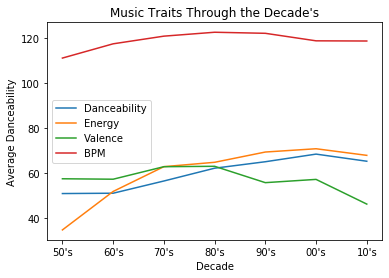

In [87]:
fiftydance = fifty_df["dnce"].mean()
sixtydance = sixty_df["dnce"].mean()
seventydance =seventy_df["dnce"].mean()
eightydance = eighty_df["dnce"].mean()
nintydance = ninty_df["dnce"].mean()
two_thousanddance = two_thousand_df["dnce"].mean()
tensdance = tens_df["dnce"].mean()

fiftyenergy = fifty_df["nrgy"].mean()
sixtyenergy = sixty_df["nrgy"].mean()
seventyenergy =seventy_df["nrgy"].mean()
eightyenergy = eighty_df["nrgy"].mean()
nintyenergy = ninty_df["nrgy"].mean()
two_thousandenergy = two_thousand_df["nrgy"].mean()
tensenergy = tens_df["nrgy"].mean()

fiftyval = fifty_df["val"].mean()
sixtyval = sixty_df["val"].mean()
seventyval =seventy_df["val"].mean()
eightyval = eighty_df["val"].mean()
nintyval = ninty_df["val"].mean()
two_thousandval = two_thousand_df["val"].mean()
tensval = tens_df["val"].mean()

fiftybpm = fifty_df["bpm"].mean()
sixtybpm = sixty_df["bpm"].mean()
seventybpm =seventy_df["bpm"].mean()
eightybpm = eighty_df["bpm"].mean()
nintybpm = ninty_df["bpm"].mean()
two_thousandbpm = two_thousand_df["bpm"].mean()
tensbpm = tens_df["bpm"].mean()

dance_df = pd.DataFrame({"Decade":["50", "60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[fiftydance, sixtydance, seventydance, eightydance, nintydance, two_thousanddance, tensdance],
                         "Energy":[fiftyenergy, sixtyenergy, seventyenergy, eightyenergy, nintyenergy, two_thousandenergy, tensenergy],
                         "Valence":[fiftyval, sixtyval, seventyval, eightyval, nintyval, two_thousandval, tensval],
                         "BPM":[fiftybpm, sixtybpm, seventybpm, eightybpm, nintybpm, two_thousandbpm, tensbpm],})
                         

dance_df
dance_df.plot()
plt.ylabel("Average Danceability")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

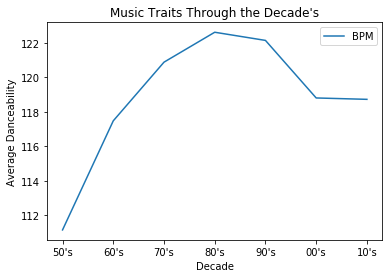

In [88]:
fiftybpm = fifty_df["bpm"].mean()
sixtybpm = sixty_df["bpm"].mean()
seventybpm =seventy_df["bpm"].mean()
eightybpm = eighty_df["bpm"].mean()
nintybpm = ninty_df["bpm"].mean()
two_thousandbpm = two_thousand_df["bpm"].mean()
tensbpm = tens_df["bpm"].mean()

dance_df2 = pd.DataFrame({"BPM":[fiftybpm, sixtybpm, seventybpm, eightybpm, nintybpm, two_thousandbpm, tensbpm],})

dance_df2.plot()
plt.ylabel("Average Danceability")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");                         

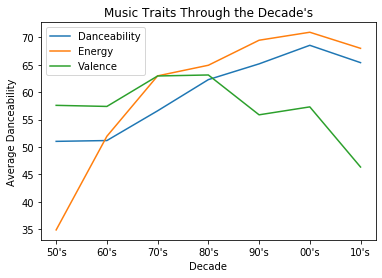

In [89]:
fiftydance = fifty_df["dnce"].mean()
sixtydance = sixty_df["dnce"].mean()
seventydance =seventy_df["dnce"].mean()
eightydance = eighty_df["dnce"].mean()
nintydance = ninty_df["dnce"].mean()
two_thousanddance = two_thousand_df["dnce"].mean()
tensdance = tens_df["dnce"].mean()

fiftyenergy = fifty_df["nrgy"].mean()
sixtyenergy = sixty_df["nrgy"].mean()
seventyenergy =seventy_df["nrgy"].mean()
eightyenergy = eighty_df["nrgy"].mean()
nintyenergy = ninty_df["nrgy"].mean()
two_thousandenergy = two_thousand_df["nrgy"].mean()
tensenergy = tens_df["nrgy"].mean()

fiftyval = fifty_df["val"].mean()
sixtyval = sixty_df["val"].mean()
seventyval =seventy_df["val"].mean()
eightyval = eighty_df["val"].mean()
nintyval = ninty_df["val"].mean()
two_thousandval = two_thousand_df["val"].mean()
tensval = tens_df["val"].mean()

fiftyval = fifty_df["val"].mean()
sixtyval = sixty_df["val"].mean()
seventyval =seventy_df["val"].mean()
eightyval = eighty_df["val"].mean()
nintyval = ninty_df["val"].mean()
two_thousandval = two_thousand_df["val"].mean()
tensval = tens_df["val"].mean()


dance_df = pd.DataFrame({"Decade":["50", "60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[fiftydance, sixtydance, seventydance, eightydance, nintydance, two_thousanddance, tensdance],
                         "Energy":[fiftyenergy, sixtyenergy, seventyenergy, eightyenergy, nintyenergy, two_thousandenergy, tensenergy],
                         "Valence":[fiftyval, sixtyval, seventyval, eightyval, nintyval, two_thousandval, tensval]})
                         

dance_df
dance_df.plot()
plt.ylabel("Average Danceability")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

In [96]:
fifty_df["top genre"].value_counts()

adult standards         33
brill building pop       9
deep adult standards     7
doo-wop                  4
merseybeat               2
british comedy           1
classic uk pop           1
louisiana blues          1
yodeling                 1
british dance band       1
classic soul             1
Name: top genre, dtype: int64

In [97]:
sixty_df["top genre"].value_counts()

adult standards           27
album rock                12
brill building pop        11
british invasion           8
art rock                   7
blues rock                 3
bebop                      2
chanson                    2
alternative country        2
british blues              1
australian rock            1
acoustic blues             1
art pop                    1
cowboy western             1
afropop                    1
australian talent show     1
drone folk                 1
american folk revival      1
baroque pop                1
afrobeat                   1
classic rock               1
classic girl group         1
beach music                1
boogaloo                   1
avant-garde jazz           1
british folk               1
appalachian folk           1
canadian folk              1
classic soul               1
bubblegum pop              1
rock-and-roll              1
blues                      1
Name: top genre, dtype: int64

In [98]:
seventy_df["top genre"].value_counts()

album rock             31
adult standards        19
glam rock              16
europop                 7
disco                   6
soft rock               4
classic uk pop          3
classic soul            3
chicago soul            2
dance pop               2
country rock            2
classic country pop     1
british folk            1
brit funk               1
dance rock              1
pop                     1
british invasion        1
native american         1
country                 1
hollywood               1
Name: top genre, dtype: int64

In [99]:
eighty_df["top genre"].value_counts()

album rock             30
dance rock             14
adult standards        13
dance pop              11
glam rock               6
mellow gold             4
disco                   3
europop                 3
new wave pop            3
eurodance               2
glam metal              2
classic rock            1
jazz fusion             1
classic danish pop      1
alternative rock        1
british soul            1
art pop                 1
bronx hip hop           1
art rock                1
glam punk               1
classic country pop     1
hi-nrg                  1
soft rock               1
bow pop                 1
Name: top genre, dtype: int64

In [100]:
ninty_df["top genre"].value_counts()

dance pop                  20
bubblegum dance             9
boy band                    9
europop                     5
eurodance                   5
album rock                  4
east coast hip hop          4
g funk                      4
canadian pop                3
disco house                 2
british soul                2
britpop                     1
deep house                  1
classic rock                1
italian pop                 1
pop                         1
german alternative rock     1
bubble trance               1
big beat                    1
atl hip hop                 1
neo mellow                  1
glam metal                  1
art rock                    1
hip hop                     1
adult standards             1
glam rock                   1
german dance                1
diva house                  1
disco                       1
Name: top genre, dtype: int64

In [102]:
two_thousand_df["top genre"].value_counts()

dance pop             42
barbadian pop          7
atl hip hop            5
bubblegum dance        4
east coast hip hop     4
alternative metal      3
pop                    3
big room               3
bronx hip hop          2
boy band               2
permanent wave         2
chicago rap            2
hip hop                2
british soul           2
europop                2
detroit hip hop        2
belgian pop            2
celtic rock            2
belgian dance          1
dirty south rap        1
disco house            1
latin                  1
neo mellow             1
hip pop                1
r&b                    1
modern rock            1
uk garage              1
Name: top genre, dtype: int64

In [104]:
tens_df["top genre"].value_counts()

dance pop                    39
big room                     10
canadian pop                  6
pop                           6
dfw rap                       5
boy band                      4
electropop                    4
canadian hip hop              2
brostep                       2
electro house                 2
neo mellow                    2
atl hip hop                   2
canadian contemporary r&b     2
modern rock                   2
electronic trap               1
country rap                   1
indie poptimism               1
celtic rock                   1
conscious hip hop             1
edm                           1
australian pop                1
aussietronica                 1
irish pop                     1
complextro                    1
alternative r&b               1
emo rap                       1
Name: top genre, dtype: int64

In [108]:
# Data Files
file_patha = "group3_resources/dataset-of-60s.csv"
file_pathb = "group3_resources/dataset-of-70s.csv"
file_pathc = "group3_resources/dataset-of-80s.csv"
file_pathd = "group3_resources/dataset-of-90s.csv"
file_pathe = "group3_resources/dataset-of-00s.csv"
file_pathf = "group3_resources/dataset-of-10s.csv"


#Load Data
sixty2_df = pd.read_csv(file_patha)
seventy2_df = pd.read_csv(file_pathb)
eighty2_df = pd.read_csv(file_pathc)
ninty2_df = pd.read_csv(file_pathd)
two_thousand2_df = pd.read_csv(file_pathe)
tens2_df = pd.read_csv(file_pathf)


In [110]:
sixty2_df.count()

track               8642
artist              8642
uri                 8642
danceability        8642
energy              8642
key                 8642
loudness            8642
mode                8642
speechiness         8642
acousticness        8642
instrumentalness    8642
liveness            8642
valence             8642
tempo               8642
duration_ms         8642
time_signature      8642
chorus_hit          8642
sections            8642
target              8642
dtype: int64

In [111]:
seventy2_df.count()

track               7766
artist              7766
uri                 7766
danceability        7766
energy              7766
key                 7766
loudness            7766
mode                7766
speechiness         7766
acousticness        7766
instrumentalness    7766
liveness            7766
valence             7766
tempo               7766
duration_ms         7766
time_signature      7766
chorus_hit          7766
sections            7766
target              7766
dtype: int64

In [112]:
eighty2_df.count()

track               6908
artist              6908
uri                 6908
danceability        6908
energy              6908
key                 6908
loudness            6908
mode                6908
speechiness         6908
acousticness        6908
instrumentalness    6908
liveness            6908
valence             6908
tempo               6908
duration_ms         6908
time_signature      6908
chorus_hit          6908
sections            6908
target              6908
dtype: int64

In [113]:
ninty2_df.count()

track               5520
artist              5520
uri                 5520
danceability        5520
energy              5520
key                 5520
loudness            5520
mode                5520
speechiness         5520
acousticness        5520
instrumentalness    5520
liveness            5520
valence             5520
tempo               5520
duration_ms         5520
time_signature      5520
chorus_hit          5520
sections            5520
target              5520
dtype: int64

In [115]:
two_thousand2_df.count()

track               5872
artist              5872
uri                 5872
danceability        5872
energy              5872
key                 5872
loudness            5872
mode                5872
speechiness         5872
acousticness        5872
instrumentalness    5872
liveness            5872
valence             5872
tempo               5872
duration_ms         5872
time_signature      5872
chorus_hit          5872
sections            5872
target              5872
dtype: int64

In [116]:
tens2_df.count()

track               6398
artist              6398
uri                 6398
danceability        6398
energy              6398
key                 6398
loudness            6398
mode                6398
speechiness         6398
acousticness        6398
instrumentalness    6398
liveness            6398
valence             6398
tempo               6398
duration_ms         6398
time_signature      6398
chorus_hit          6398
sections            6398
target              6398
dtype: int64

In [117]:
tens2_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


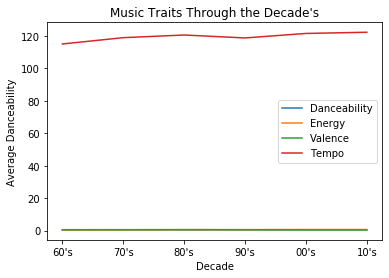

In [120]:
sixtydance2 = sixty2_df["danceability"].mean()
seventydance2 =seventy2_df["danceability"].mean()
eightydance2 = eighty2_df["danceability"].mean()
nintydance2 = ninty2_df["danceability"].mean()
two_thousanddance2 = two_thousand2_df["danceability"].mean()
tensdance2 = tens2_df["danceability"].mean()

sixtyenergy2 = sixty2_df["energy"].mean()
seventyenergy2 =seventy2_df["energy"].mean()
eightyenergy2 = eighty2_df["energy"].mean()
nintyenergy2 = ninty2_df["energy"].mean()
two_thousandenergy2 = two_thousand2_df["energy"].mean()
tensenergy2 = tens2_df["energy"].mean()

sixtyval2 = sixty2_df["valence"].mean()
seventyval2 =seventy2_df["valence"].mean()
eightyval2 = eighty2_df["valence"].mean()
nintyval2 = ninty2_df["valence"].mean()
two_thousandval2 = two_thousand2_df["valence"].mean()
tensval2 = tens2_df["valence"].mean()

sixtybpm2 = sixty2_df["tempo"].mean()
seventybpm2 =seventy2_df["tempo"].mean()
eightybpm2 = eighty2_df["tempo"].mean()
nintybpm2 = ninty2_df["tempo"].mean()
two_thousandbpm2 = two_thousand2_df["tempo"].mean()
tensbpm2 = tens2_df["tempo"].mean()

dance_df2 = pd.DataFrame({"Decade":["60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[sixtydance2, seventydance2, eightydance2, nintydance2, two_thousanddance2, tensdance2],
                         "Energy":[sixtyenergy2, seventyenergy2, eightyenergy2, nintyenergy2, two_thousandenergy2, tensenergy2],
                         "Valence":[sixtyval2, seventyval2, eightyval2, nintyval2, two_thousandval2, tensval2],
                         "Tempo":[sixtybpm2, seventybpm2, eightybpm2, nintybpm2, two_thousandbpm2, tensbpm2],})
                         

dance_df2
dance_df2.plot()
plt.ylabel("Average Danceability")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

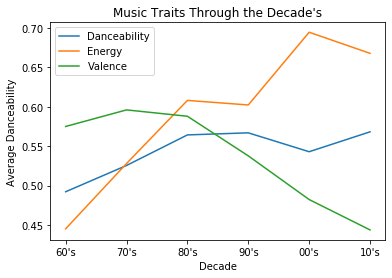

In [121]:
sixtydance2 = sixty2_df["danceability"].mean()
seventydance2 =seventy2_df["danceability"].mean()
eightydance2 = eighty2_df["danceability"].mean()
nintydance2 = ninty2_df["danceability"].mean()
two_thousanddance2 = two_thousand2_df["danceability"].mean()
tensdance2 = tens2_df["danceability"].mean()

sixtyenergy2 = sixty2_df["energy"].mean()
seventyenergy2 =seventy2_df["energy"].mean()
eightyenergy2 = eighty2_df["energy"].mean()
nintyenergy2 = ninty2_df["energy"].mean()
two_thousandenergy2 = two_thousand2_df["energy"].mean()
tensenergy2 = tens2_df["energy"].mean()

sixtyval2 = sixty2_df["valence"].mean()
seventyval2 =seventy2_df["valence"].mean()
eightyval2 = eighty2_df["valence"].mean()
nintyval2 = ninty2_df["valence"].mean()
two_thousandval2 = two_thousand2_df["valence"].mean()
tensval2 = tens2_df["valence"].mean()


dance_df2 = pd.DataFrame({"Decade":["60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[sixtydance2, seventydance2, eightydance2, nintydance2, two_thousanddance2, tensdance2],
                         "Energy":[sixtyenergy2, seventyenergy2, eightyenergy2, nintyenergy2, two_thousandenergy2, tensenergy2],
                         "Valence":[sixtyval2, seventyval2, eightyval2, nintyval2, two_thousandval2, tensval2]})
                         

dance_df2
dance_df2.plot()
plt.ylabel("Average Danceability")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

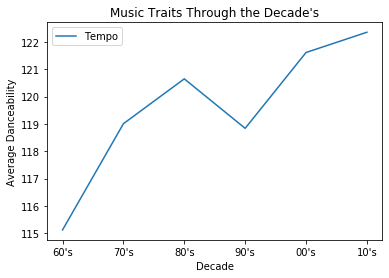

In [122]:
sixtybpm2 = sixty2_df["tempo"].mean()
seventybpm2 =seventy2_df["tempo"].mean()
eightybpm2 = eighty2_df["tempo"].mean()
nintybpm2 = ninty2_df["tempo"].mean()
two_thousandbpm2 = two_thousand2_df["tempo"].mean()
tensbpm2 = tens2_df["tempo"].mean()

dance_df2 = pd.DataFrame({"Tempo":[sixtybpm2, seventybpm2, eightybpm2, nintybpm2, two_thousandbpm2, tensbpm2]})
                         

dance_df2
dance_df2.plot()
plt.ylabel("Average Danceability")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");